In [ ]:
import sys
sys.path.append('..')

In [ ]:
%load_ext autoreload
%autoreload 2
from my_code import model as m
from my_code import layers
from my_code import functions as f

In [ ]:
from pennylane import numpy as np
import pennylane as qml

# Data

In [ ]:

file_path = '../data/energies/Trial/Strings_Energies.txt'  # Replace with the actual path to your 'data.txt' file
string_list, number_list = f.read_data_file(file_path)
score_list = np.array(number_list, requires_grad=False)/1000
angles_list = np.array([f.string_to_angles(string) for string in string_list], requires_grad=False)

In [ ]:
X, Y = angles_list, score_list

# Model

## Define

In [1]:
circuit_layers = \
    [layers.angle_preparation()] + \
    [layers.rotationX_layer(), layers.rotationZ_layer(), layers.rotationZZ_layer()] * 50 +  \
    [layers.ancillas(n_ancillas=1)] + \
    [layers.mesurament(qubits=[0])]

NameError: name 'layers' is not defined

In [ ]:

SCORE_PREDICTOR = m.model(
    n_qubits_data = 12, 
    circuit_layers = circuit_layers
)

In [ ]:
SCORE_PREDICTOR.draw_circuit(size=(15, 6))

## Train

In [ ]:
SCORE_PREDICTOR.set_data(    
    data_X = X, 
    data_Y = Y, 
    # data_validation = data_validation
)

In [ ]:
np.random.permutation(50)

tensor([47,  4, 22,  8, 12, 17, 29, 14, 34, 27,  3, 30, 44, 40, 33, 24,
         7,  1, 49, 48, 13, 32, 39, 25, 43, 19,  2, 15, 23, 36,  0, 45,
        37, 11, 31, 16,  9, 42, 46,  5, 38, 10,  6, 20, 26, 18, 41, 35,
        28, 21], requires_grad=True)

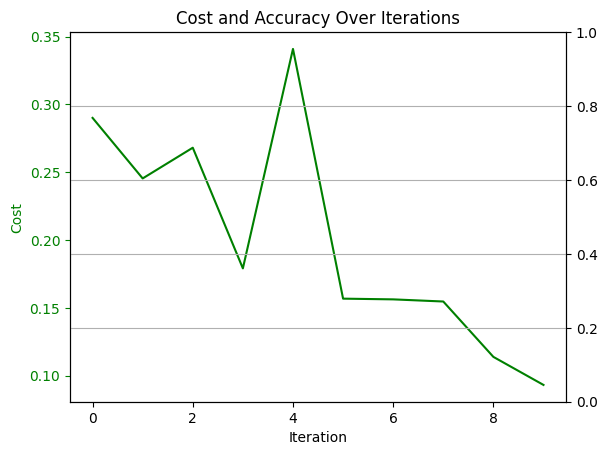

Epoch: 0 | Iter:    10 | Cost: 0.0931863 | Accuracy: 0.9068137 
Epoch: 0 | Iter:    11 | Cost: 0.1999434 | Accuracy: 0.8000566 
Epoch: 0 | Iter:    12 | Cost: 0.3507802 | Accuracy: 0.6492198 
Epoch: 0 | Iter:    13 | Cost: 0.2643077 | Accuracy: 0.7356923 
Epoch: 0 | Iter:    14 | Cost: 0.1782533 | Accuracy: 0.8217467 


In [ ]:
SCORE_PREDICTOR.train(
    epochs = 100,     
    batch_size = 10,
    optimizer = qml.SPSAOptimizer(maxiter=1000, c=0.15, a=0.2),
    initialize_params=True, 
    plot_options={
        'accuracy': False, 
        'accuracy_validation': False, 
        'plot_every': 5
    }
)